<span style="font-size:16pt;">
Group Members: Katherine Martini, Lucas Lobo, Joyce Chen, Caleb Sharkey <br>
Course: QTM 350 <br>
Assignment: Final Project <br>
Date: May 2, 2025 <br>
</span>

In [39]:
import pandas as pd
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt

In [21]:
df_wdi = pd.read_csv('QTM350Final.csv', encoding='latin1')

#display(df_wdi)

In [25]:
region_mapping = {
    'Argentina': 'South America',
    'Belize': 'Central America',
    'Costa Rica': 'Central America',
    'El Salvador': 'Central America',
    'Guatemala': 'Central America',
    'Honduras': 'Central America',
    'Nicaragua': 'Central America',
    'Panama': 'Central America',
    'Mexico': 'Central America',
    'Bolivia': 'South America',
    'Brazil': 'South America',
    'Chile': 'South America',
    'Colombia': 'South America',
    'Ecuador': 'South America',
    'Guyana': 'South America',
    'Paraguay': 'South America',
    'Peru': 'South America',
    'Suriname': 'South America',
    'Uruguay': 'South America',
    'Venezuela, RB': 'South America',
    'Cuba': 'Caribbean',
    'Dominican Republic': 'Caribbean',
    'Haiti': 'Caribbean',
    'Jamaica': 'Caribbean',
    'St. Martin (French part)': 'Caribbean',
    'Puerto Rico': 'Caribbean',
}


In [27]:
# Add the Region column
df_wdi['Region'] = df_wdi['Country Name'].map(region_mapping)

# Define a function to find the highest and lowest values for a given metric
def analyze_metric(df, metric_name):
    metric_df = df[df['Series Name'] == metric_name].copy()
    year_columns = [col for col in df.columns if '[YR' in col]
    metric_df.loc[:, year_columns] = metric_df[year_columns].apply(pd.to_numeric, errors='coerce')
    metric_df['Average Value'] = metric_df[year_columns].mean(axis=1)
    
    # Group by region and find the highest and lowest values
    grouped = metric_df.groupby('Region')
    highest = grouped.apply(lambda x: x.loc[x['Average Value'].idxmax(), ['Country Name', 'Average Value']])
    lowest = grouped.apply(lambda x: x.loc[x['Average Value'].idxmin(), ['Country Name', 'Average Value']])
    
    return highest, lowest

In [28]:
# 1. Life expectancy at birth, total (years)
life_expectancy_highest, life_expectancy_lowest = analyze_metric(
    df_wdi, 'Life expectancy at birth, total (years)'
)
print("Life Expectancy (Highest):")
print(life_expectancy_highest)
print("\nLife Expectancy (Lowest):")
print(life_expectancy_lowest)

Life Expectancy (Highest):
                             Country Name  Average Value
Region                                                  
Caribbean        St. Martin (French part)      76.319592
Central America                Costa Rica      76.953000
South America                       Chile      75.545469

Life Expectancy (Lowest):
                Country Name  Average Value
Region                                     
Caribbean              Haiti      56.766245
Central America    Guatemala      64.522265
South America        Bolivia      60.270714


/var/folders/dg/c6hqd29d2t9826r1jy81880m0000gn/T/ipykernel_33708/1184167815.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  highest = grouped.apply(lambda x: x.loc[x['Average Value'].idxmax(), ['Country Name', 'Average Value']])
/var/folders/dg/c6hqd29d2t9826r1jy81880m0000gn/T/ipykernel_33708/1184167815.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  lowest = grouped.apply(lambda x: x.loc[x['Avera

In [29]:
# 2. Mortality rate, under-5 (per 1,000 live births)
mortality_highest, mortality_lowest = analyze_metric(
    df_wdi, 'Mortality rate, under-5 (per 1,000 live births)'
)
print("\nMortality Rate (Highest):")
print(mortality_highest)
print("\nMortality Rate (Lowest):")
print(mortality_lowest)


Mortality Rate (Highest):
                Country Name  Average Value
Region                                     
Caribbean              Haiti     120.226531
Central America    Guatemala      66.069388
South America        Bolivia      90.569388

Mortality Rate (Lowest):
                Country Name  Average Value
Region                                     
Caribbean               Cuba      11.965306
Central America   Costa Rica      16.157143
South America          Chile      17.112245


/var/folders/dg/c6hqd29d2t9826r1jy81880m0000gn/T/ipykernel_33708/1184167815.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  highest = grouped.apply(lambda x: x.loc[x['Average Value'].idxmax(), ['Country Name', 'Average Value']])
/var/folders/dg/c6hqd29d2t9826r1jy81880m0000gn/T/ipykernel_33708/1184167815.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  lowest = grouped.apply(lambda x: x.loc[x['Avera

In [30]:
# 3. Adolescent fertility rate (births per 1,000 women ages 15-19)
fertility_highest, fertility_lowest = analyze_metric(
    df_wdi, 'Adolescent fertility rate (births per 1,000 women ages 15-19)'
)
print("\nAdolescent Fertility Rate (Highest):")
print(fertility_highest)
print("\nAdolescent Fertility Rate (Lowest):")
print(fertility_lowest)


Adolescent Fertility Rate (Highest):
                       Country Name  Average Value
Region                                            
Caribbean        Dominican Republic      99.143898
Central America           Nicaragua     126.473429
South America                Guyana      97.110224

Adolescent Fertility Rate (Lowest):
                             Country Name  Average Value
Region                                                  
Caribbean        St. Martin (French part)      35.587714
Central America                Costa Rica      75.293102
South America                       Chile      55.050367


/var/folders/dg/c6hqd29d2t9826r1jy81880m0000gn/T/ipykernel_33708/1184167815.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  highest = grouped.apply(lambda x: x.loc[x['Average Value'].idxmax(), ['Country Name', 'Average Value']])
/var/folders/dg/c6hqd29d2t9826r1jy81880m0000gn/T/ipykernel_33708/1184167815.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  lowest = grouped.apply(lambda x: x.loc[x['Avera

In [50]:
# Filter the dataset for the three variables
life_expectancy = df_wdi[df_wdi['Series Name'] == 'Life expectancy at birth, total (years)']
mortality_rate = df_wdi[df_wdi['Series Name'] == 'Mortality rate, under-5 (per 1,000 live births)']
fertility_rate = df_wdi[df_wdi['Series Name'] == 'Adolescent fertility rate (births per 1,000 women ages 15-19)']

# Extract year columns and calculate averages
year_columns = [col for col in map(str, df_wdi.columns) if '[YR' in col]

# Calculate the average values for each variable
life_expectancy['Average Value'] = life_expectancy[year_columns].apply(pd.to_numeric, errors='coerce').mean(axis=1)
mortality_rate['Average Value'] = mortality_rate[year_columns].apply(pd.to_numeric, errors='coerce').mean(axis=1)
fertility_rate['Average Value'] = fertility_rate[year_columns].apply(pd.to_numeric, errors='coerce').mean(axis=1)

# Merge the datasets on 'Country Name' for scatterplots
merged_df = life_expectancy[['Country Name', 'Average Value']].merge(
    mortality_rate[['Country Name', 'Average Value']],
    on='Country Name',
    suffixes=('_LifeExpectancy', '_MortalityRate')
).merge(
    fertility_rate[['Country Name', 'Average Value']],
    on='Country Name'
)
merged_df.rename(columns={'Average Value': 'AdolescentFertilityRate'}, inplace=True)

/var/folders/dg/c6hqd29d2t9826r1jy81880m0000gn/T/ipykernel_33708/3944970657.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  life_expectancy['Average Value'] = life_expectancy[year_columns].apply(pd.to_numeric, errors='coerce').mean(axis=1)
/var/folders/dg/c6hqd29d2t9826r1jy81880m0000gn/T/ipykernel_33708/3944970657.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mortality_rate['Average Value'] = mortality_rate[year_columns].apply(pd.to_numeric, errors='coerce').mean(axis=1)
/var/folders/dg/c6hqd29d

In [51]:
# Ensure no NaN values in the data for each scatterplot
valid_data1 = merged_df[['Average Value_LifeExpectancy', 'Average Value_MortalityRate']].dropna()
x1 = valid_data1['Average Value_LifeExpectancy']
y1 = valid_data1['Average Value_MortalityRate']

valid_data2 = merged_df[['Average Value_LifeExpectancy', 'AdolescentFertilityRate']].dropna()
x2 = valid_data2['Average Value_LifeExpectancy']
y2 = valid_data2['AdolescentFertilityRate']

valid_data3 = merged_df[['Average Value_MortalityRate', 'AdolescentFertilityRate']].dropna()
x3 = valid_data3['Average Value_MortalityRate']
y3 = valid_data3['AdolescentFertilityRate']

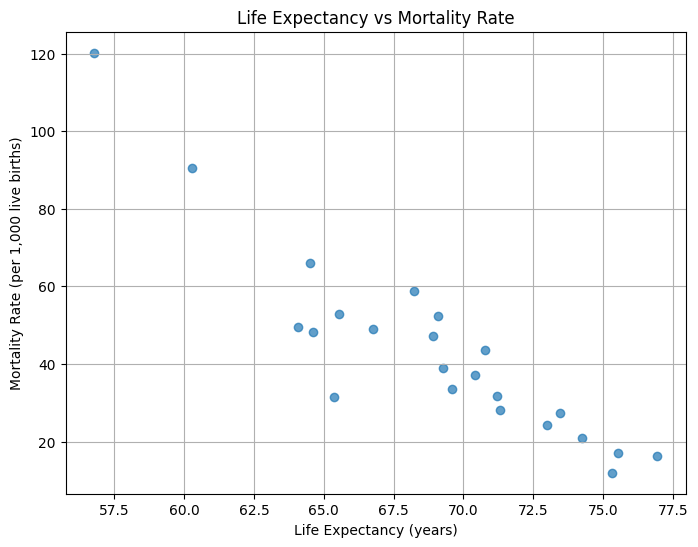

In [52]:
# Scatterplot 1: Life Expectancy vs Mortality Rate
plt.figure(figsize=(8, 6))
plt.scatter(merged_df['Average Value_LifeExpectancy'], merged_df['Average Value_MortalityRate'], alpha=0.7)
plt.title('Life Expectancy vs Mortality Rate')
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Mortality Rate (per 1,000 live births)')
plt.grid(True)
plt.show()

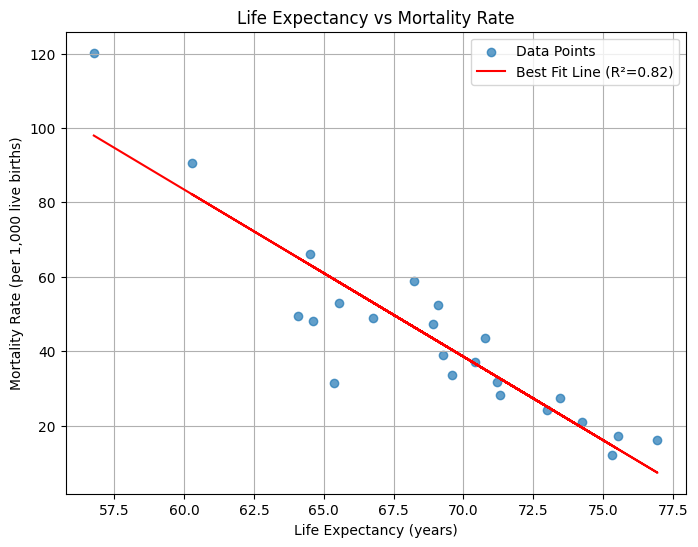

In [ ]:
# Scatterplot 1: Life Expectancy vs Mortality Rate with regression line
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(x1, y1)
plt.figure(figsize=(8, 6))
plt.scatter(x1, y1, alpha=0.7, label='Data Points')
plt.plot(x1, slope1 * x1 + intercept1, color='red', label=f'Best Fit Line (R²={r_value1**2:.2f})')
plt.title('Life Expectancy vs Mortality Rate')
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Mortality Rate (per 1,000 live births)')
plt.legend()
plt.grid(True)
plt.show()


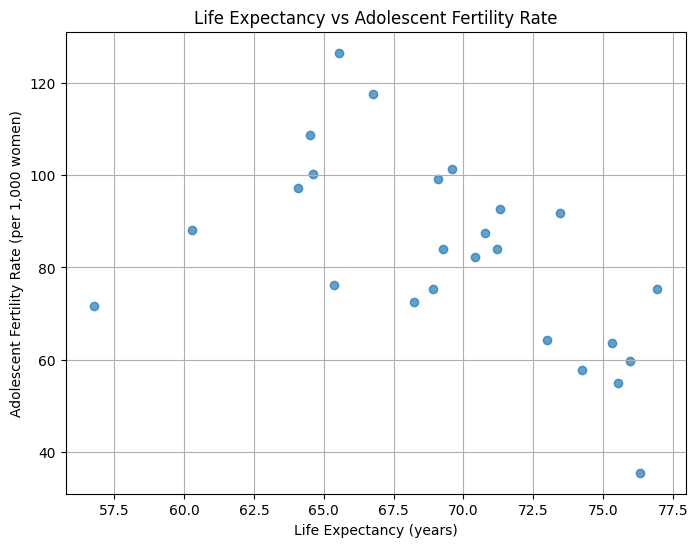

In [35]:
# Scatterplot 2: Life Expectancy vs Adolescent Fertility Rate
plt.figure(figsize=(8, 6))
plt.scatter(merged_df['Average Value_LifeExpectancy'], merged_df['AdolescentFertilityRate'], alpha=0.7)
plt.title('Life Expectancy vs Adolescent Fertility Rate')
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Adolescent Fertility Rate (per 1,000 women)')
plt.grid(True)
plt.show()

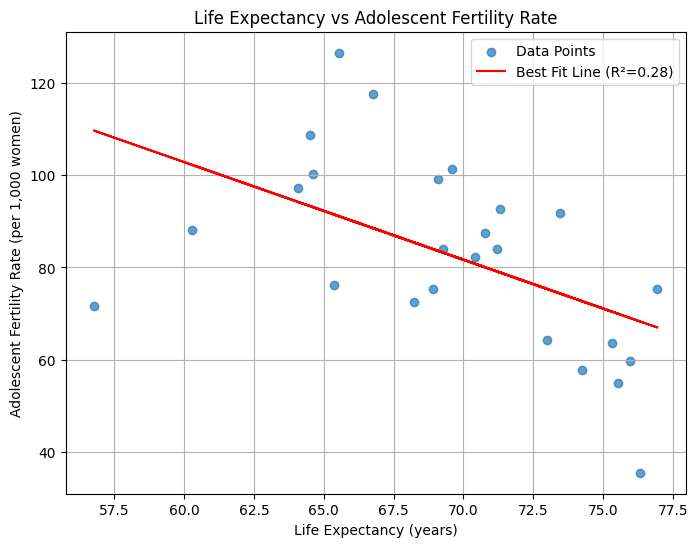

In [ ]:
# Scatterplot 2: Life Expectancy vs Adolescent Fertility Rate with regression line
x2 = merged_df['Average Value_LifeExpectancy']
y2 = merged_df['AdolescentFertilityRate']
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(x2, y2)

plt.figure(figsize=(8, 6))
plt.scatter(x2, y2, alpha=0.7, label='Data Points')
plt.plot(x2, slope2 * x2 + intercept2, color='red', label=f'Best Fit Line (R²={r_value2**2:.2f})')
plt.title('Life Expectancy vs Adolescent Fertility Rate')
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Adolescent Fertility Rate (per 1,000 women)')
plt.legend()
plt.grid(True)
plt.show()

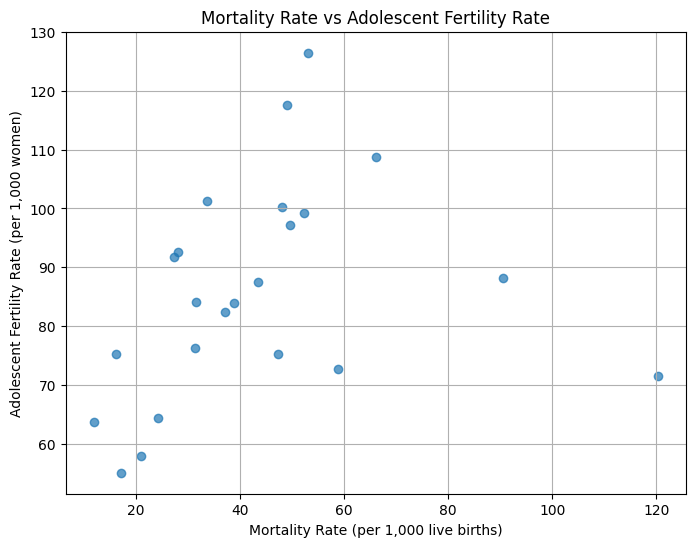

In [36]:
# Scatterplot 3: Mortality Rate vs Adolescent Fertility Rate
plt.figure(figsize=(8, 6))
plt.scatter(merged_df['Average Value_MortalityRate'], merged_df['AdolescentFertilityRate'], alpha=0.7)
plt.title('Mortality Rate vs Adolescent Fertility Rate')
plt.xlabel('Mortality Rate (per 1,000 live births)')
plt.ylabel('Adolescent Fertility Rate (per 1,000 women)')
plt.grid(True)
plt.show()

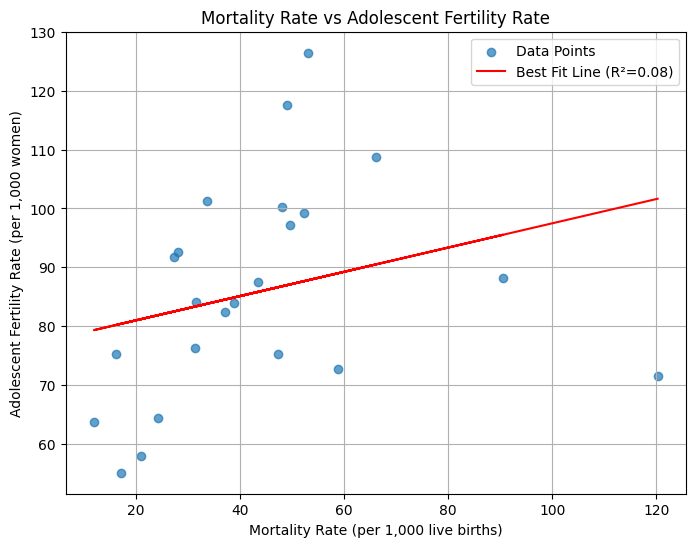

In [ ]:
# Scatterplot 3: Mortality Rate vs Adolescent Fertility Rate with regression line
slope3, intercept3, r_value3, p_value3, std_err3 = linregress(x3, y3)
plt.figure(figsize=(8, 6))
plt.scatter(x3, y3, alpha=0.7, label='Data Points')
plt.plot(x3, slope3 * x3 + intercept3, color='red', label=f'Best Fit Line (R²={r_value3**2:.2f})')
plt.title('Mortality Rate vs Adolescent Fertility Rate')
plt.xlabel('Mortality Rate (per 1,000 live births)')
plt.ylabel('Adolescent Fertility Rate (per 1,000 women)')
plt.legend()
plt.grid(True)
plt.show()